In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
import statsmodels.api as sm

In [106]:
train=pd.read_csv(r"C:\Users\DEVIL\Downloads\boston-housing\train.csv")
test=pd.read_csv(r"C:\Users\DEVIL\Downloads\boston-housing\test.csv")
exm=pd.read_csv(r"C:\Users\DEVIL\Downloads\boston-housing\submission_example.csv")
X,y=train.iloc[:,train.columns!="medv"],train.iloc[:,train.columns=="medv"]
X.drop("ID",axis=1,inplace=True)
print(X.describe())
X.isnull().sum()

             crim          zn       indus        chas         nox          rm  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean     3.360341   10.689189   11.293483    0.060060    0.557144    6.265619   
std      7.352272   22.674762    6.998123    0.237956    0.114955    0.703952   
min      0.006320    0.000000    0.740000    0.000000    0.385000    3.561000   
25%      0.078960    0.000000    5.130000    0.000000    0.453000    5.884000   
50%      0.261690    0.000000    9.900000    0.000000    0.538000    6.202000   
75%      3.678220   12.500000   18.100000    0.000000    0.631000    6.595000   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.725000   

              age         dis         rad         tax     ptratio       black  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean    68.226426    3.709934    9.633634  409.279279   18.448048  359.466096   
std     28.133344    1.9811

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

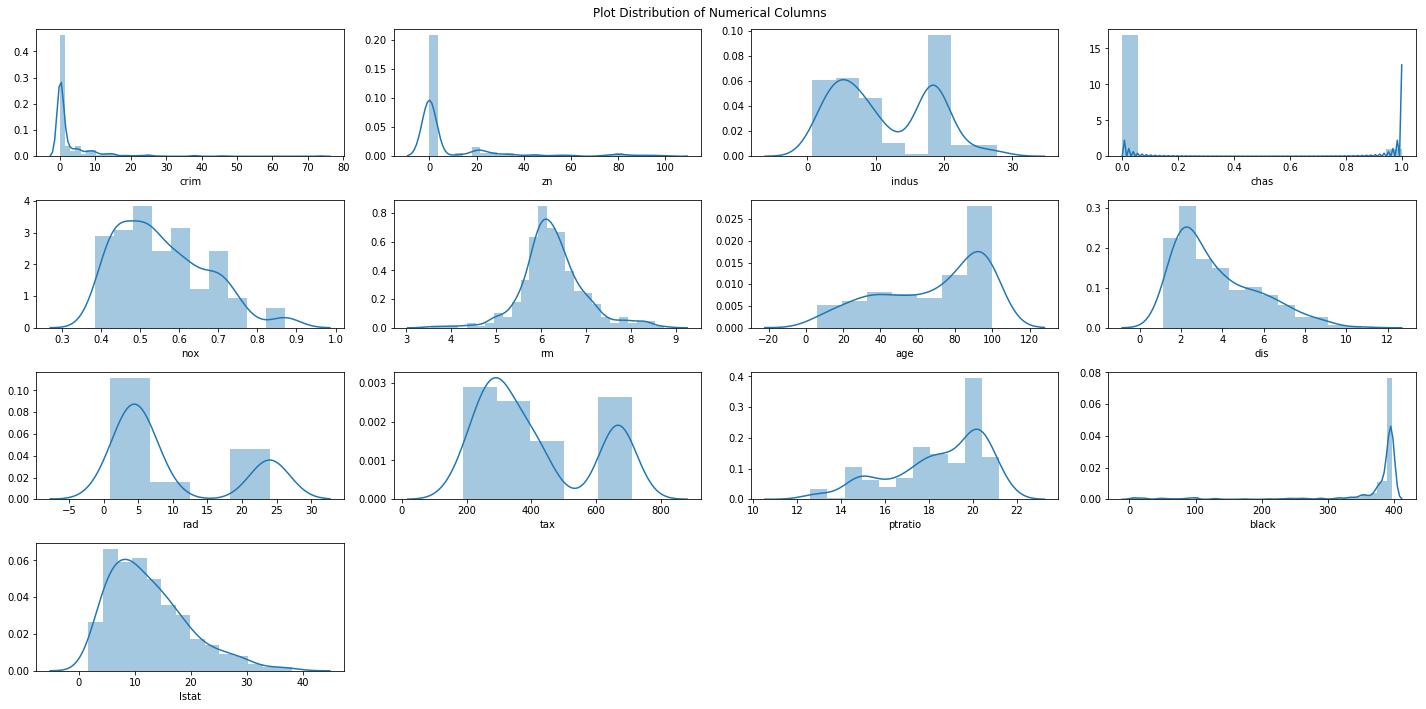

In [67]:
fig=plt.figure(figsize=(20,10))
j=0
columns=X.columns
for i in X.columns:
    plt.subplot(4,4,j+1)
    j+=1
    sns.distplot(X[i],label=i)
fig.suptitle("Plot Distribution of Numerical Columns")
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

It is clear from the above plots distributions that independent variables are not normally distributed let's solve this issue using normalizing 

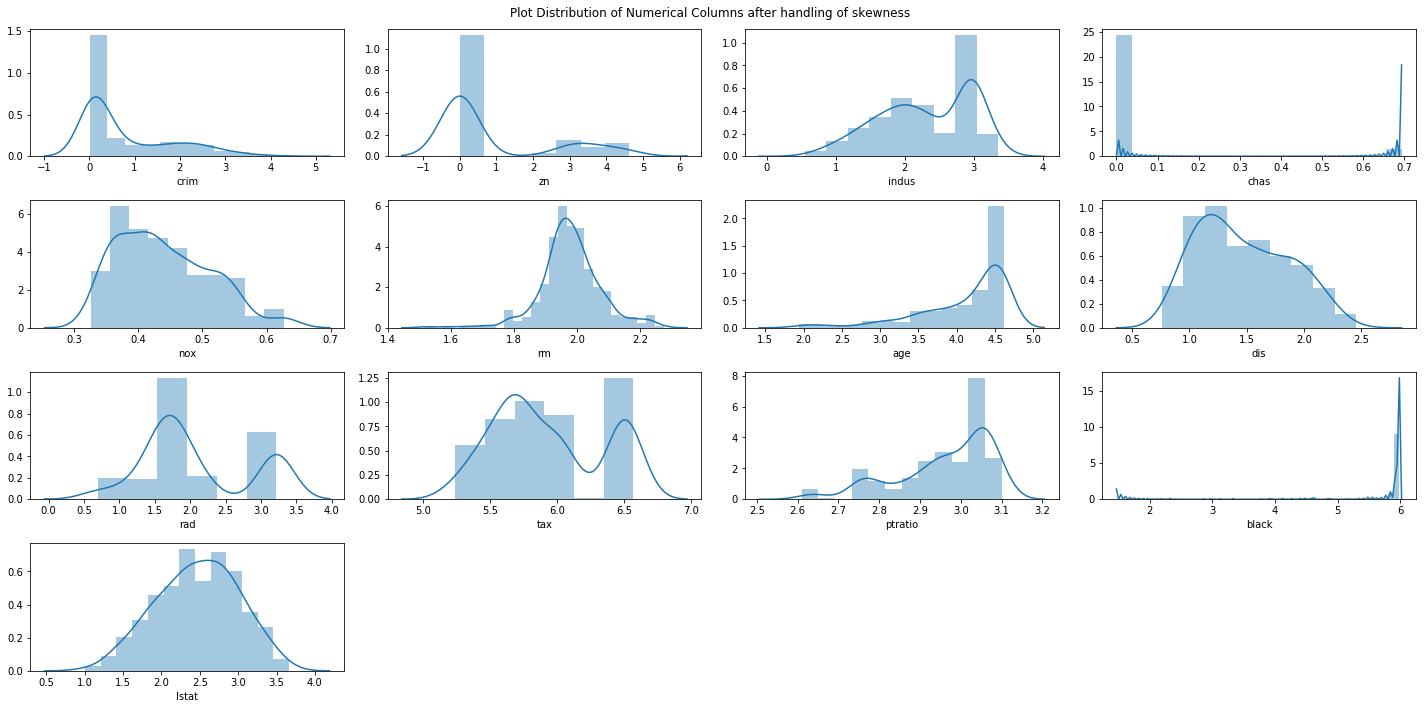

In [68]:
X=np.log(1+X)
fig=plt.figure(figsize=(20,10))
j=0
for i in columns:
    plt.subplot(4,4,j+1)
    j+=1
    sns.distplot(X[i],label=i)
fig.suptitle("Plot Distribution of Numerical Columns after handling of skewness")
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

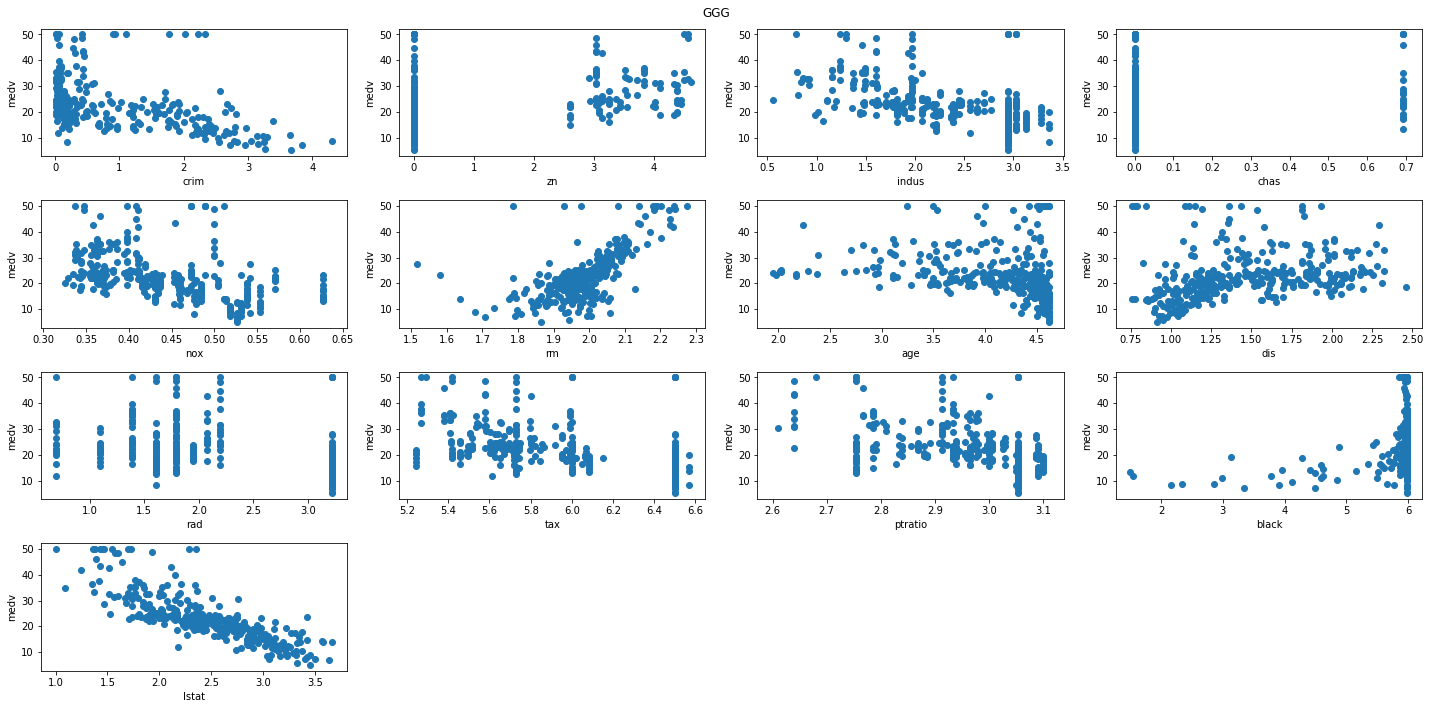

In [62]:
fig=plt.figure(figsize=(20,10))
j=0
for i in columns:
    plt.subplot(4,4,j+1)
    j+=1
    plt.scatter(X[i],y)
    plt.xlabel(i)
    plt.ylabel(y.columns[0])
fig.suptitle("Bivariate Analysis")
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

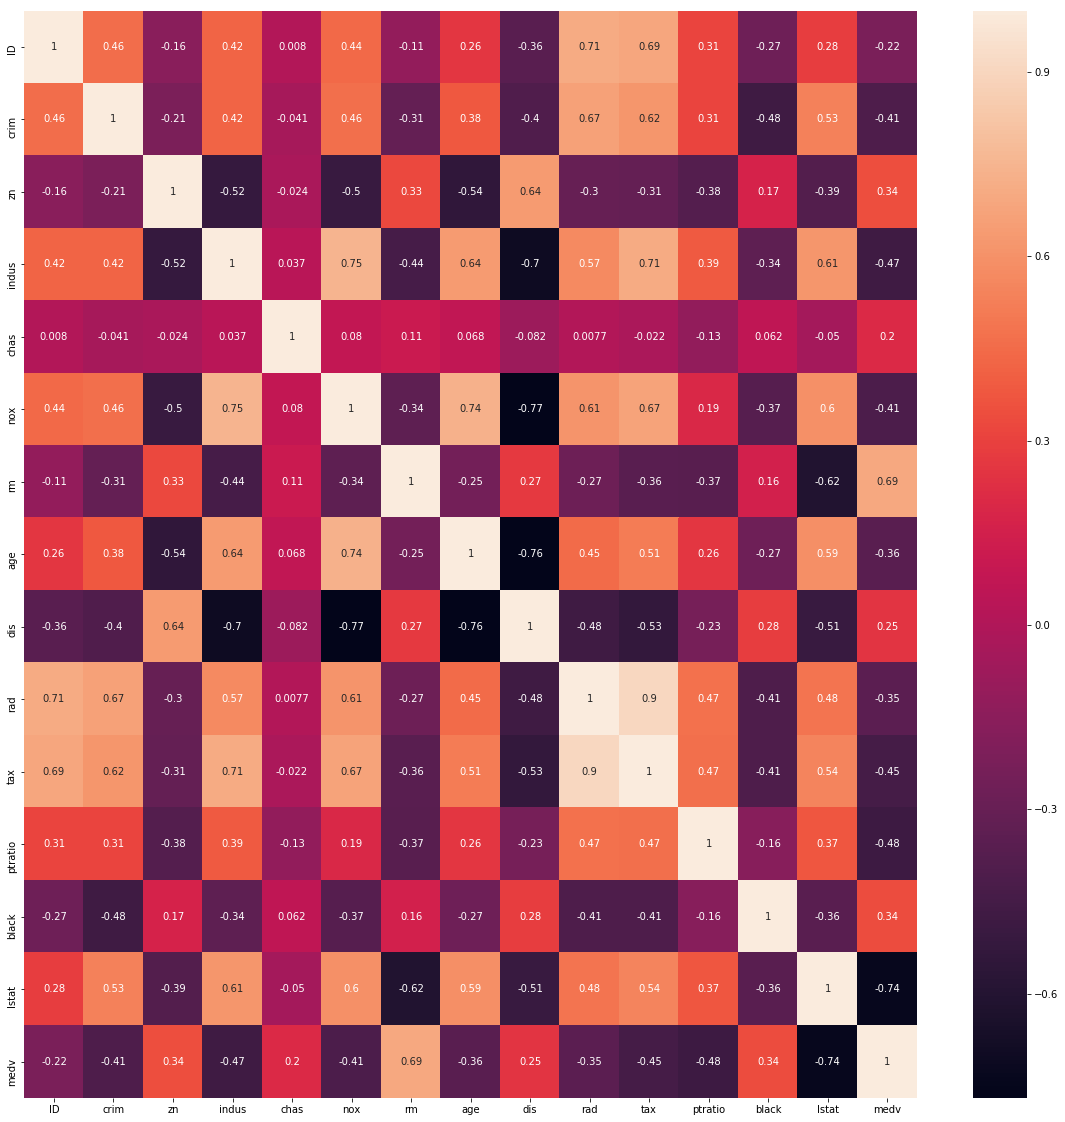

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

In [184]:
X_train=X[["nox","rm","lstat"]]

In [185]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [186]:
lreg=LinearRegression()
svr=svm.SVR(kernel="linear")

In [187]:
dt=DecisionTreeRegressor(max_depth=8)
rf=RandomForestRegressor()

In [189]:
lreg.fit(x_train,y_train)
lreg.score(x_test,y_test)

0.6873079909023355

In [190]:
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6201260027398329

In [191]:
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.5668991431269671

In [192]:
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.7237864533744237

In [193]:
X_=sm.add_constant(X_train)
reg=sm.OLS(y,X_).fit()
reg.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 01 Jul 2019   Prob (F-statistic):           1.24e-71
Time:                        01:26:09   Log-Likelihood:                -1042.3
No. Observations:                 333   AIC:                             2093.
Df Residuals:                     329   BIC:                             2108.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7398      4.122     -0.179      0.858      -8.849       7.369
nox            2.2245      3.324      0.669      0.504      -4.314       8.763
rm             4.9108      0.552      8.902      0.000       3.826       5.996
lstat         -0.6791      0.065    -10.521      0.000      -0.806      -0.552
==============================================================================
Omnibus:                      120.752   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              416.391
Skew:                           1.598   Prob(JB):                     3.82e-91
Kurtosis:                       7.449   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""